## Yelp Data Challenge - Wordcloud & NLP

## Wordcloud

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('df_final.csv')

In [5]:
df.head()

,business_id,name,avg_stars,address,longitude,latitude,review_id,stars,text,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,KEAHrqN-1DV0gmuNHM6Eww,5.0,As part of a birthday celebration weekend for ...,xP1IYu2eGfxMWV9tjrurIw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,6SgvNWJltnZhW7duJgZ42w,5.0,This is mine and my fiancé's favorite steakhou...,oFyOUOeGTRZhFPF9uTqrTQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,iwx6s6yQxc7yjS7NFANZig,4.0,Nice atmosphere and wonderful service. I had t...,2aeNFntqY2QDZLADNo8iQQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,UVUMu_bELdA56Ryfbur-DA,5.0,Every year a group of us (we had 6 this year) ...,gmPP4YFrgYsYQqPYokMgFA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,Jjz9W-wBkoBoMcB8ZQs5zQ,5.0,We had early reservations for a party of 9 for...,9bxdPvAhP6cuipD5s2UnCg


### Wordcloud

In [6]:
# NLP
import re
import nltk
from nltk.tokenize import *
from nltk.corpus import stopwords
from nltk.stem import *
from nltk import *

# Wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
review = pd.DataFrame(df[['business_id', 'text']].astype(str).groupby('business_id')['text'].apply(" ".join)).reset_index()

In [8]:
review.head()

,business_id,text
0,--9e1ONYQuAa-CB_Rrw7Tw,As part of a birthday celebration weekend for ...
1,-1m9o3vGRA8IBPNvNqKLmA,We had a fantastic experience last night at Ba...
2,-1vfRrlnNnNJ5boOVghMPA,We are always down to try a new sushi place. W...
3,-3zffZUHoY8bQjGfPSoBKQ,Warm and elegant was my first impression as I ...
4,-8R_-EkGpUhBk55K9Dd4mg,Love this place!! I work down the street & com...


In [9]:
# stemming
def stem(word):
    a = WordNetLemmatizer()
    temp_text = a.lemmatize(word, "v")
    return a.lemmatize(temp_text, "n")

# Tokenize
def tokenize(review):
    tok = TreebankWordTokenizer().tokenize(review)
    return tok

# Remove stopwords
def remove_stop(review):
    stopset = set(stopwords.words('english'))
    result_text= [w for w in review if not w in stopset]
    return result_text

In [10]:
def process(review_text):
    tokenized_review = tokenize(review_text)

    # stem review and lower case
    stemmed_review = ""
    for word in tokenized_review:
        word = word.lower()
        stemmed_review += stem(word) + " "

    # tokenize stemmed text
    tok_stem_review = tokenize(stemmed_review)

    # remove stop words
    stop_review = remove_stop(tok_stem_review)

    # keep word with only letters
    letter_review = []
    for word in stop_review:
        if(word.isalpha()):
            letter_review.append(word)
    return letter_review

def get_wordcloud(letter_review):
    wc = WordCloud(width = 1600, 
               height = 800, 
               random_state = 1, 
               max_words = 200,
              background_color = 'white')
    
    wc.generate(str(letter_review))
    # declare our figure 
    plt.figure(figsize=(20,10))
    # add title to the graph
    plt.title("Word Cloud for Restaurant Review", fontsize=40,color='black')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=10)
    # after lot of congiguration finally plot the graph
    plt.show()

In [13]:
review_text = review.loc[2,'text']

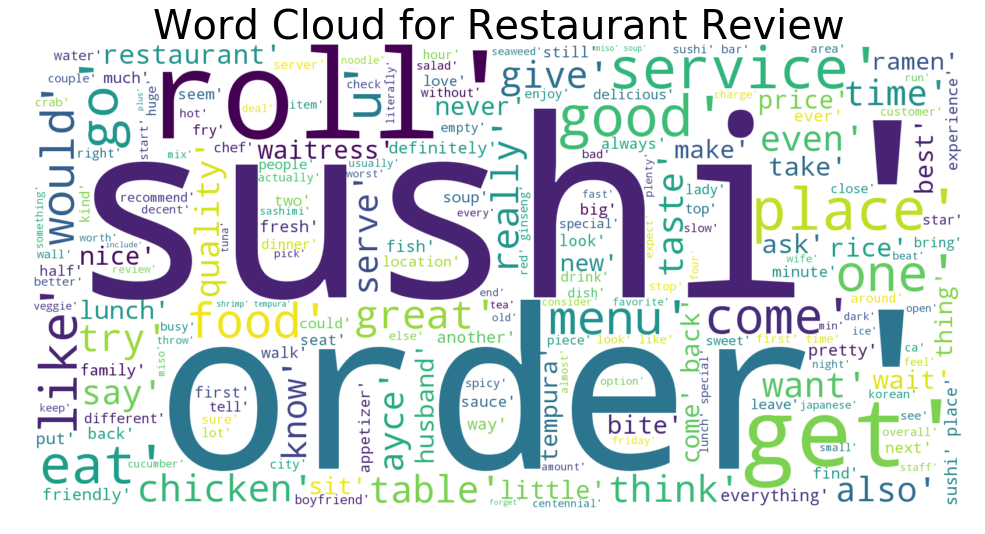

In [15]:
get_wordcloud(process(review_text))

## NLP

### Define documents

In [5]:
documents = df['text'].values

In [8]:
documents.dtype, documents.shape

(dtype('O'), (240723,))

In [9]:
documents[10]

"Went for a nice anniversary dinner. Researched a lot of steakhouses and thought this was reasonably priced (compared to others) for Vegas so thought we'd give it a shot. made reservations but was not crowded on a Monday night. We split the bbq shrimp which were very good for an appetizer. Then we each had salads. I ordered the filet mignon which was a small 6oz serving for $50. I could've easily eaten 2 of them. But the steak was very tender and nicely seasoned. Husband had the bone in ribeye which is what they are known for. He enjoyed it. We split the mashed potatoes which were very good, but kinda hard to screw those up. We each had 1 drink and the bill was $200. Service was good. They give you nice warm rolls which were tasty. We would go back, but we like trying new places and it will probably be a few years before we go back to Vegas anyways."

### Define target variable

In [10]:
df['favorable'] = df['stars'] > 4

In [11]:
target = df['favorable'].values

In [15]:
target.mean(), documents.shape, target.shape

(0.48533376536517076, (240723,), (240723,))

### Create training and testing dataset

In [16]:
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    documents,
    target,
    test_size = 0.8,
    random_state = 42
)

In [55]:
# Get NLP representation
from sklearn.feature_extraction.text import TfidfVectorizer

# Create vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 5000)

# Vectorize train and test
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [112]:
df.head()

,attributes,categories,longitude,latitude,name,review_count,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,favorable
0,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...","['Cajun/Creole', 'Steakhouses', 'Restaurants']",-115.16919,36.123183,Delmonico Steakhouse,1451,4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g,True
1,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...","['Cajun/Creole', 'Steakhouses', 'Restaurants']",-115.16919,36.123183,Delmonico Steakhouse,1451,4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw,False
2,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...","['Cajun/Creole', 'Steakhouses', 'Restaurants']",-115.16919,36.123183,Delmonico Steakhouse,1451,4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA,True
3,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...","['Cajun/Creole', 'Steakhouses', 'Restaurants']",-115.16919,36.123183,Delmonico Steakhouse,1451,4.0,1,2017-02-12,1,heZd0W3HuPJxZBrCYD3wDw,2,"Lousy steak. \n\nThe service was great - Todd,...",3,OtKA03ALQQ1CBhtaJod_Jw,False
4,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...","['Cajun/Creole', 'Steakhouses', 'Restaurants']",-115.16919,36.123183,Delmonico Steakhouse,1451,4.0,0,2016-10-15,0,ZqMUHOJg9lGOmfqQ7RXj7A,1,This was supposed to be a very special dinner ...,0,kOll36Me-rM9NsqoDnejKA,False


In [108]:
# get the vocab of your tfidf
vec = pd.DataFrame(tfidf_train.A, columns = vectorizer.get_feature_names())
vec

,00,00pm,10,100,1000,10am,10pm,11,110,11am,...,youre,yrs,yuck,yum,yummy,yup,yuzu,zero,zone,zucchini
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.342605,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.090622,...,0.0,0.0,0.0,0.0,0.057242,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.212060,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


### Classifying positive/negative reviews

#### Naive Bayes Classifier

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

model_nb = MultinomialNB()

model_nb.fit(tfidf_train, y_train)

# prediction
pred = model_nb.predict(tfidf_test)

In [84]:
# Get accuracy score
score = metrics.accuracy_score(y_test, pred)
score

0.8103687317931861

In [85]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred, labels = [1,0])
cm_df = pd.DataFrame(cm, columns = ['Good','Bad'])
cm_df.index = ['Good','Bad']
cm_df

,Good,Bad
Good,78333,15166
Bad,21353,77727


#### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model_lrc = LogisticRegression()

model_lrc.fit(tfidf_train, y_train)

# prediction
pred = model_lrc.predict(tfidf_test)

In [88]:
score = metrics.accuracy_score(y_test, pred)
score

0.829597204264224

In [89]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred, labels = [1,0])
cm_df = pd.DataFrame(cm, columns = ['Good','Bad'])
cm_df.index = ['Good','Bad']
cm_df

,Good,Bad
Good,77778,15721
Bad,17095,81985


#### Get key features that give positive/negative prediction

In [90]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]

In [91]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()
n = 20
get_top_values(model_lrc.coef_[0], n, words)

['amazing',
 'best',
 'delicious',
 'awesome',
 'excellent',
 'perfect',
 'thank',
 'highly',
 'fantastic',
 'great',
 'phenomenal',
 'incredible',
 'love',
 'perfection',
 'favorite',
 'outstanding',
 'wonderful',
 'vegas',
 'bomb',
 'perfectly']

In [92]:
get_bottom_values(model_lrc.coef_[0], n, words)

['worst',
 'ok',
 'horrible',
 'slow',
 'rude',
 'bland',
 'terrible',
 'average',
 'disappointing',
 'mediocre',
 'okay',
 'decent',
 'wasn',
 'wouldn',
 'unfortunately',
 'overpriced',
 'overall',
 'awful',
 'poor',
 'lacking']